   Unnamed: 0  flow_duration  Header_Length  Protocol Type  Duration  \
0        3233       0.000000           0.00          46.53     63.36   
1         912       0.000000           0.00          45.16     71.64   
2        7005       0.155276          41.75          41.26     70.45   
3       13669       0.000000           0.00          47.00     64.00   
4        7895       0.000000           0.00          47.00     64.00   

           Rate         Srate  Drate  fin_flag_number  syn_flag_number  ...  \
0     22.666768     22.666768    0.0                0                0  ...   
1     30.076685     30.076685    0.0                0                0  ...   
2  27595.714830  27595.714830    0.0                0                0  ...   
3      5.858490      5.858490    0.0                0                0  ...   
4     53.647950     53.647950    0.0                0                0  ...   

          Std  Tot size          IAT  Number   Magnitue      Radius  \
0    3.472171    572.

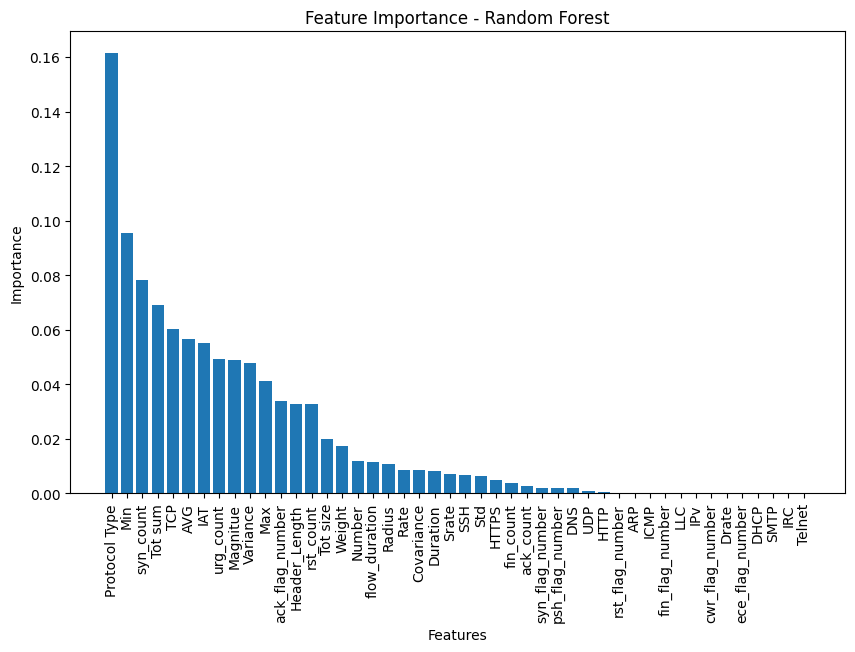

   Unnamed: 0  flow_duration  Header_Length  Protocol Type  Duration  \
0         143       0.000000           0.00          45.59     62.08   
1        4528       0.002190           4.78          46.59     64.00   
2       18979       0.001110           1.59          46.12     63.20   
3       15862       0.031130          26.74          45.72     64.00   
4        8215       0.000387           1.16          46.12     63.13   

        Rate      Srate  Drate  fin_flag_number  syn_flag_number  ...  \
0  35.445971  35.445971    0.0                0                0  ...   
1  21.065130  21.065130    0.0                0                0  ...   
2  17.030552  17.030552    0.0                0                0  ...   
3   5.043963   5.043963    0.0                0                0  ...   
4  49.146224  49.146224    0.0                0                0  ...   

          AVG        Std  Tot size          IAT  Number   Magnitue     Radius  \
0  564.254681  26.835848    562.46  83573787.60

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

def load_data(file_path):
    """
    Load the dataset from the specified file path.
    """
    data = pd.read_csv(file_path)
    print(data.head())  # Display the first few rows of the dataset
    return data

def preprocess_data(data):
    """
    Preprocess the dataset:
    - Encode the target variable
    - Drop unnecessary columns
    - Scale the features
    - Return features and target labels
    """
    # Retain 'Unnamed: 0' as the unique identifier for submission
    #data['label_encoded'] = LabelEncoder().fit_transform(data['label'])

    # Drop unnecessary columns and separate features and target
    X = data.drop(columns=['Unnamed: 0', 'label', 'label_encoded'])  # Exclude 'Unnamed: 0'
    y = data['label_encoded']

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y, scaler

def train_models(X_train, y_train):
    """
    Train different classification models and return them.
    """
    # Initialize the models
    log_reg = LogisticRegression(max_iter=1000)
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    svm = SVC()
    KNN= KNeighborsClassifier(n_neighbors=3,algorithm='auto')
    MLP =MLPClassifier(hidden_layer_sizes=(5,2), max_iter=1000, random_state=42)

    # Train each model
    log_reg.fit(X_train, y_train)
    rf.fit(X_train, y_train)
    svm.fit(X_train, y_train)
    KNN.fit(X_train, y_train)
    MLP.fit(X_train, y_train)


    return log_reg, rf, svm, KNN, MLP

def evaluate_models(models, X_val, y_val):
    """
    Evaluate the trained models and return their accuracy and classification reports.
    """
    results = {}
    target__names = ['class 0', 'class 1', 'class 2']
    for model in models:
        # Make predictions
        y_pred = model.predict(X_val)
        # Calculate accuracy
        accuracy = accuracy_score(y_val, y_pred)
        # Get classification report
        report = classification_report(y_val, y_pred, target_names=label_encoder.classes_)
        results[model.__class__.__name__] = (accuracy, report)

    return results

def plot_feature_importance(model, feature_names):
    """
    Plot feature importance for Random Forest model.
    """
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title("Feature Importance - Random Forest")
    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
    plt.xlabel("Features")
    plt.ylabel("Importance")
    plt.show()

def predict_unknown_data(model, scaler, unknown_file_path):
    """
    Load unknown dataset, preprocess it, make predictions, and save submission file.
    """
    # Load unknown data
    unknown_data = pd.read_csv(unknown_file_path)
    print(unknown_data.head())  # Verify the data structure

    # Retain 'Unnamed: 0' as the ID for the submission
    unknown_ids = unknown_data['Unnamed: 0']

    # Preprocess the unknown dataset (drop 'Unnamed: 0' for prediction)
    unknown_data_processed = unknown_data.drop(columns=['Unnamed: 0'])

    # Scale the unknown dataset using the same scaler from training
    unknown_data_scaled = scaler.transform(unknown_data_processed)

    # Make predictions on the unknown dataset
    predictions = model.predict(unknown_data_scaled)

    # Prepare submission file with 'Unnamed: 0' as 'ID' and the predicted labels
    submission = pd.DataFrame({
        'ID': unknown_ids,
        'label': label_encoder.inverse_transform(predictions)  # Convert predicted labels back to original values
    })

    # Save the submission file
    submission.to_csv('final_submission.csv', index=False)
    print("Submission file created successfully!")

# Main execution flow
if __name__ == "__main__":
    # Load training data
    training_data = load_data('Training Dataset.csv')
    label_encoder = LabelEncoder()
    training_data['label_encoded'] = label_encoder.fit_transform(training_data['label'])

    # Preprocess training data
    X_scaled, y, scaler = preprocess_data(training_data)

    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Train the models
    models = train_models(X_train, y_train)

    # Evaluate the models
    results = evaluate_models(models, X_val, y_val)

    # Print evaluation results
    for model_name, (accuracy, report) in results.items():
        print(f"{model_name} Accuracy: {accuracy}")
        print(f"{model_name} Classification Report:\n{report}")

    # Plot feature importance for Random Forest
    plot_feature_importance(models[1], training_data.drop(columns=['Unnamed: 0', 'label', 'label_encoded']).columns)

    # Predict unknown dataset
    predict_unknown_data(models[1], scaler, 'Unknown dataset.csv')  # Use the best model (Random Forest)
